In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [45]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start = '2012-01-01', end='2017-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859330,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838936,394024400


In [46]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,28.897499,29.129999,28.897499,29.129999,27.261316,56998000
2016-12-27,29.129999,29.450001,29.122499,29.315001,27.434458,73187600
2016-12-28,29.379999,29.504999,29.049999,29.190001,27.317467,83623600
2016-12-29,29.112499,29.277500,29.100000,29.182501,27.310452,60158000
2016-12-30,29.162500,29.299999,28.857500,28.955000,27.097544,122345200


In [47]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859330,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838936,394024400


In [48]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


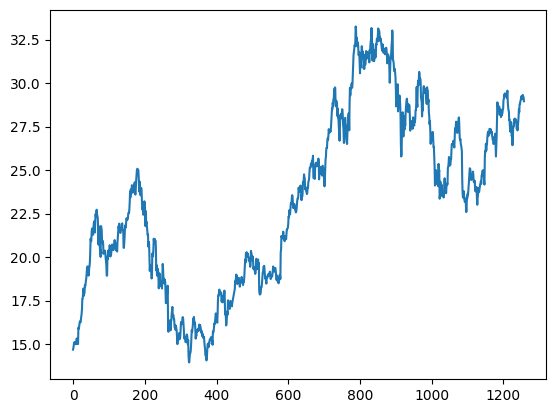

In [49]:
plt.plot(df.Close)

In [50]:
df


,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
1253,28.897499,29.129999,28.897499,29.129999,56998000
1254,29.129999,29.450001,29.122499,29.315001,73187600
1255,29.379999,29.504999,29.049999,29.190001,83623600
1256,29.112499,29.277500,29.100000,29.182501,60158000


In [51]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253    27.913875
1254    27.942350
1255    27.965550
1256    27.986450
1257    28.003975
Name: Close, Length: 1258, dtype: float64

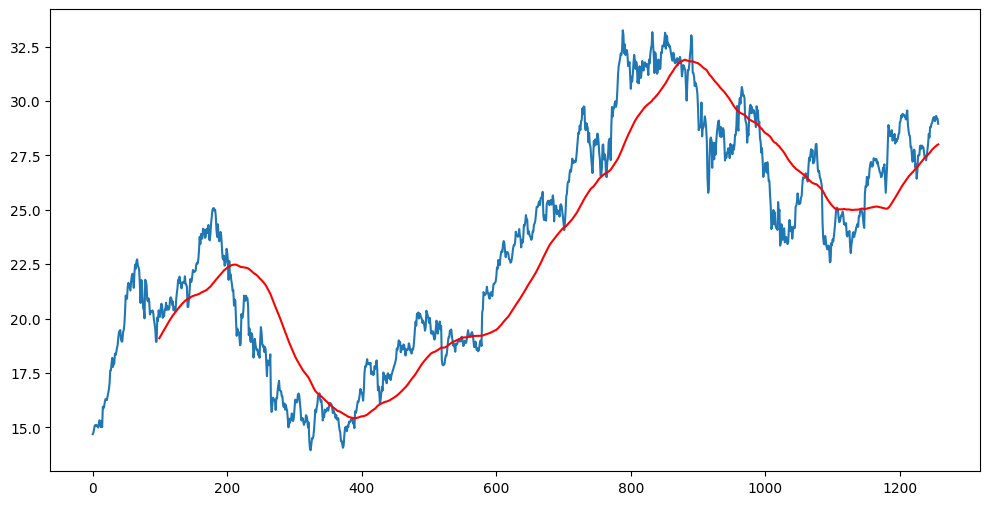

In [52]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [53]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253    26.494150
1254    26.512575
1255    26.527800
1256    26.541250
1257    26.553775
Name: Close, Length: 1258, dtype: float64

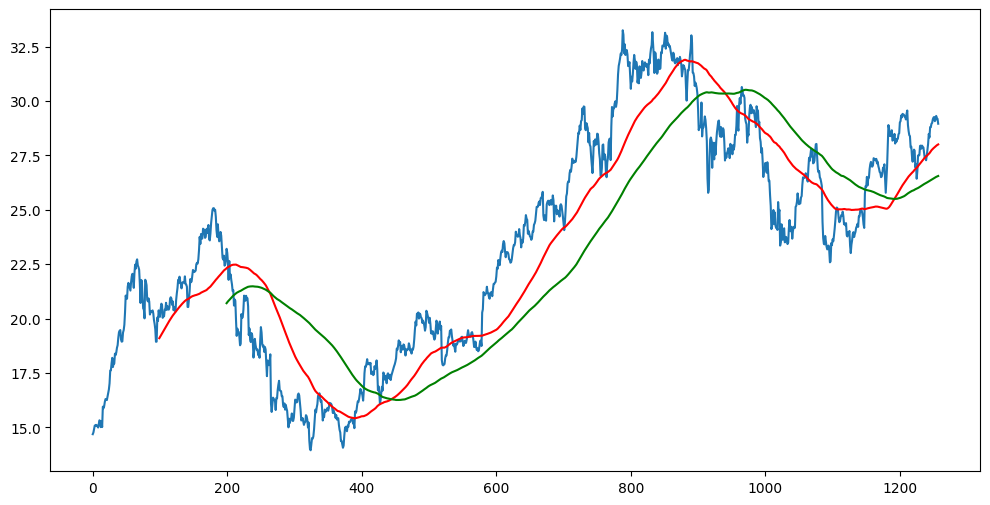

In [54]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [55]:
df.shape


(1258, 5)

In [56]:
# Splitting Data into traing and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(880, 1)
(378, 1)


In [57]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [58]:
data_testing.head()

,Close
880,31.500000
881,31.422501
882,30.642500
883,30.017500
884,30.820000


In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03829999],
       [0.04238899],
       [0.05088162],
       [0.05896719],
       [0.05772752],
       [0.06052138],
       [0.0592447 ],
       [0.05709842],
       [0.05417503],
       [0.06322274],
       [0.07138232],
       [0.06886598],
       [0.05508164],
       [0.06823689],
       [0.0552852 ],
       [0.10385403],
       [0.10009808],
       [0.10500121],
       [0.11560307],
       [0.12202338],
       [0.12148682],
       [0.11950709],
       [0.12794419],
       [0.13588168],
       [0.14487391],
       [0.15939832],
       [0.18990878],
       [0.19037133],
       [0.20735659],
       [0.22004919],
       [0.19823491],
       [0.20663495],
       [0.20646845],
       [0.23002205],
       [0.22667306],
       [0.23287134],
       [0.2440098 ],
       [0.25020818],
       [0.26806299],
       [0.28107012],
       [0.28482612],
       [0.28613985],
       [0.26389998],
       [0.25853421],
       [0.25932985],
       [0.28023761],
       [0.28612137],
       [0.298

In [60]:
data_training_array.shape

(880, 1)

In [61]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train),np.array(y_train)

In [62]:
#ML MODEL

In [63]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [64]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
    input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [66]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50


In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# making predictions

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test


In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()